In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('insurance.csv')


In [162]:
data['sex']=data['sex'].map({'female': 0, 'male': 1})

In [163]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [164]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [165]:
data.describe()

,age,sex,bmi,children,smoker,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000


In [166]:
vector_ages=data['age'].values
print(vector_ages)

[19 18 28 ... 18 21 61]


In [167]:
factor_regions=pd.Categorical(data['region'])
print(factor_regions)

['southwest', 'southeast', 'southeast', 'northwest', 'northwest', ..., 'northwest', 'northeast', 'southeast', 'southwest', 'northwest']
Length: 1338
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']


In [168]:
lists=[data['age'], data['bmi'], data['expenses']]
print(lists)

[0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1338, dtype: float64, 0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64]


In [169]:
matrix=np.array(data[['age', 'bmi']])
print(matrix)

[[19.  27.9]
 [18.  33.8]
 [28.  33. ]
 ...
 [18.  36.9]
 [21.  25.8]
 [61.  29.1]]


In [170]:
data_frame=data[['age', 'bmi', 'expenses']]
print(data_frame)

      age   bmi  expenses
0      19  27.9  16884.92
1      18  33.8   1725.55
2      28  33.0   4449.46
3      33  22.7  21984.47
4      32  28.9   3866.86
...   ...   ...       ...
1333   50  31.0  10600.55
1334   18  31.9   2205.98
1335   18  36.9   1629.83
1336   21  25.8   2007.95
1337   61  29.1  29141.36

[1338 rows x 3 columns]


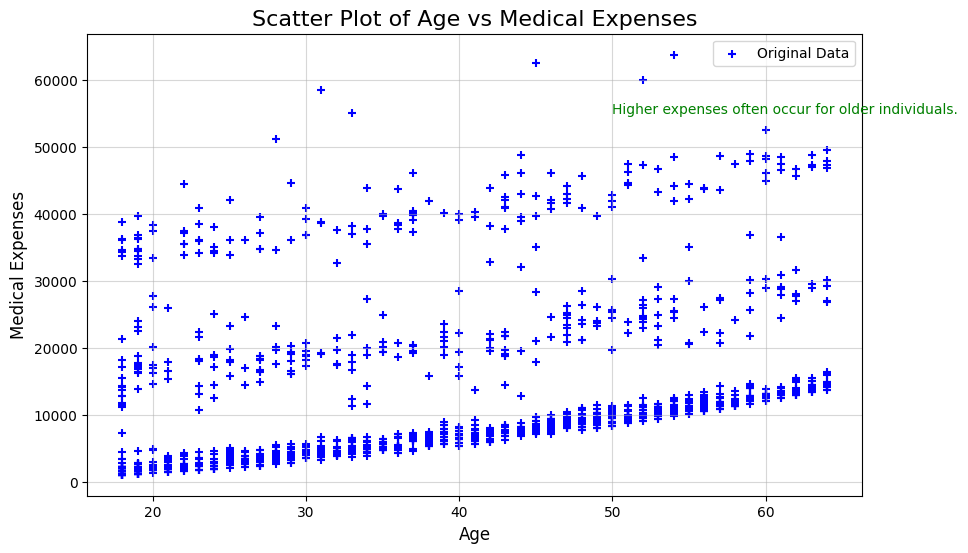

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['expenses'], c='blue', marker='+', label='Original Data')
plt.title("Scatter Plot of Age vs Medical Expenses", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Medical Expenses", fontsize=12)
plt.text(50, 55000, "Higher expenses often occur for older individuals.", fontsize=10, color='green')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

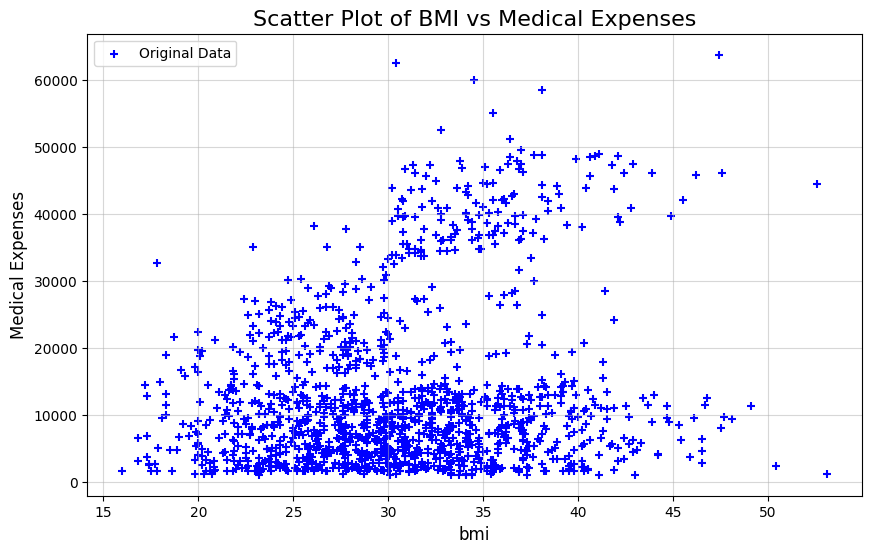

In [186]:
plt.figure(figsize=(10, 6))
plt.scatter(data['bmi'], data['expenses'], c='blue', marker='+', label='Original Data')
plt.title("Scatter Plot of BMI vs Medical Expenses", fontsize=16)
plt.xlabel("bmi", fontsize=12)
plt.ylabel("Medical Expenses", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

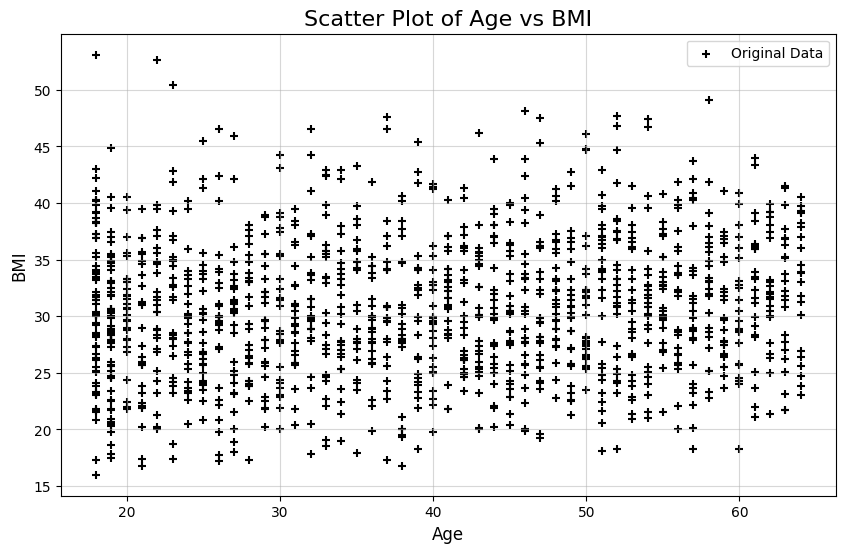

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['bmi'], c='black', marker='+', label='Original Data')
plt.title("Scatter Plot of Age vs BMI", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [173]:
smokersbelow39=data[(data['smoker'] == 1) & (data['age'] < 39)]

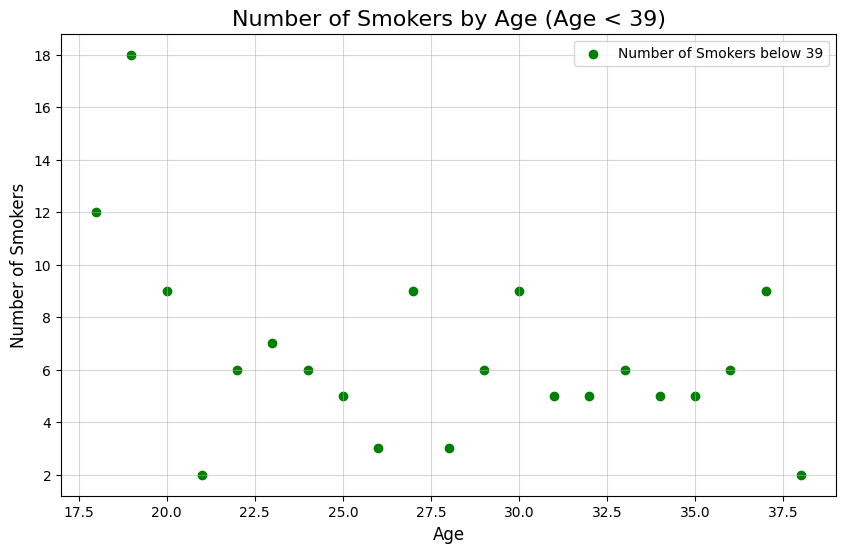

In [182]:
age_counts = smokersbelow39['age'].value_counts()
plt.figure(figsize=(10, 6))
plt.scatter(age_counts.index, age_counts.values, marker='o', color='green', label='Number of Smokers below 39')
plt.title("Number of Smokers by Age (Age < 39)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [175]:
smokersabove39=data[(data['smoker'] == 1) & (data['age'] > 39)]

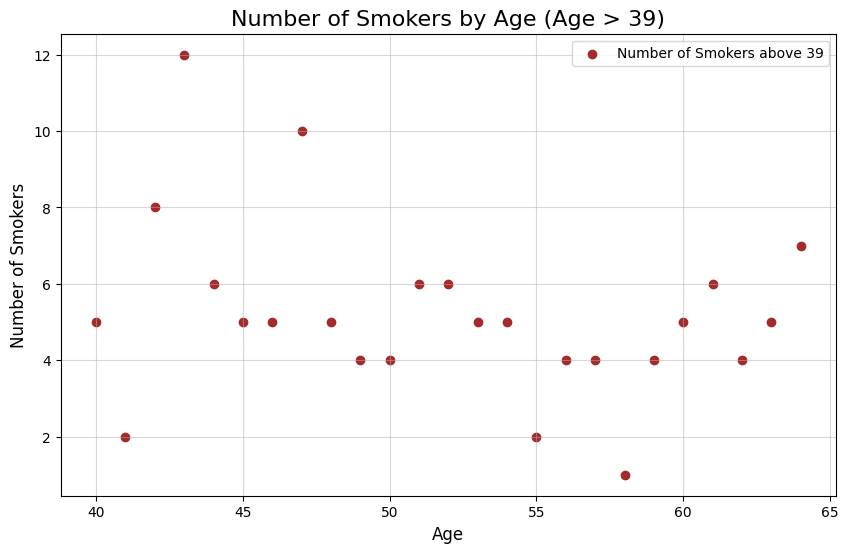

In [176]:
age_counts = smokersabove39['age'].value_counts()
plt.figure(figsize=(10, 6))
plt.scatter(age_counts.index, age_counts.values, marker='o', color='brown', label='Number of Smokers above 39')
plt.title("Number of Smokers by Age (Age > 39)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [177]:
smokers = data[data['smoker'] == 1]
smokers_by_age = smokers.groupby('age').size()

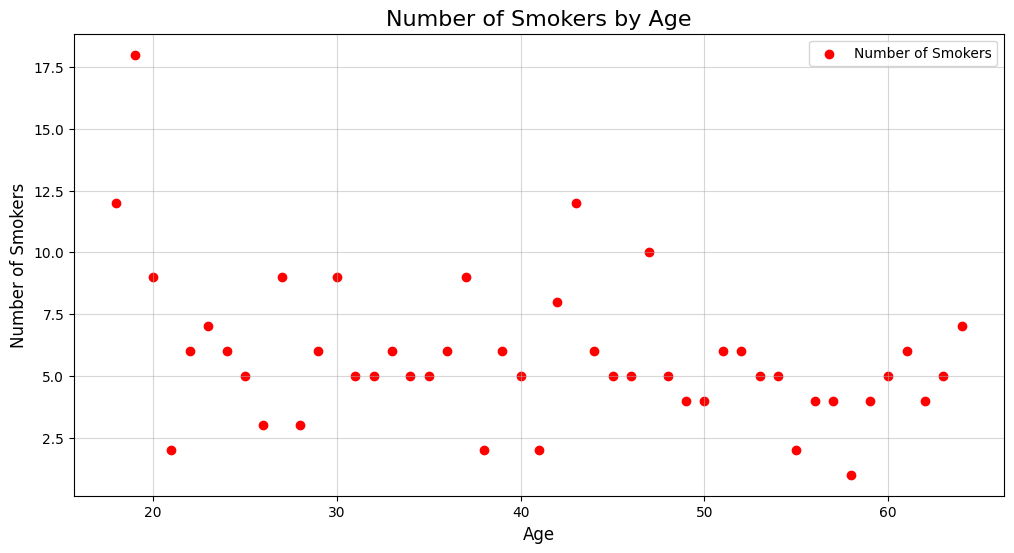

In [178]:
plt.figure(figsize=(12, 6))
plt.scatter(smokers_by_age.index, smokers_by_age.values, marker='o', color='red', label='Number of Smokers')
plt.title("Number of Smokers by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

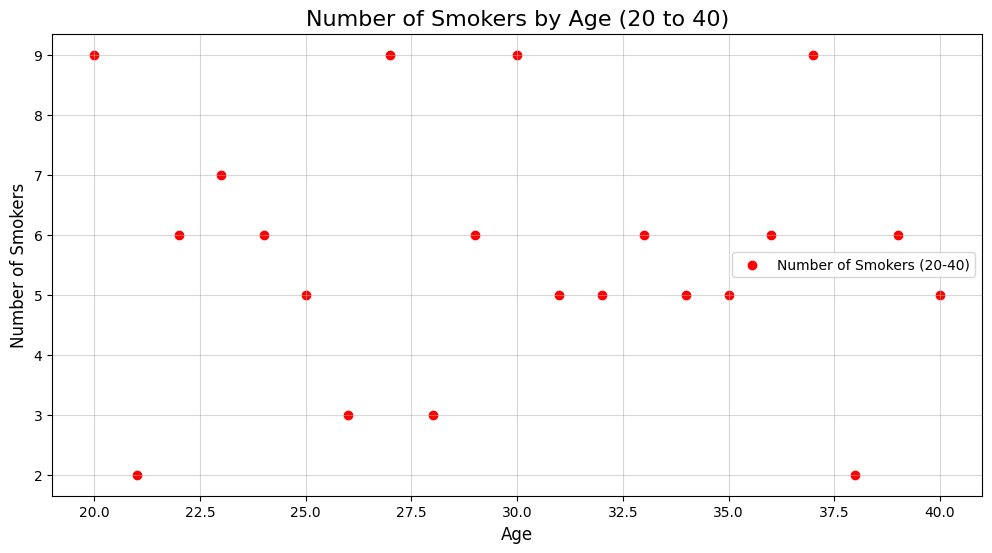

In [179]:
smokers_by_age_filtered=smokers_by_age[(smokers_by_age.index >= 20) & (smokers_by_age.index <= 40)]
plt.figure(figsize=(12, 6))
plt.scatter(smokers_by_age_filtered.index, smokers_by_age_filtered.values, marker='o', color='red', label='Number of Smokers (20-40)')
plt.title("Number of Smokers by Age (20 to 40)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Smokers", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [180]:
filtered_data=data.loc[(data['age']>=30) & (data['age']<=40)]
print(filtered_data)

      age  sex   bmi  children  smoker     region  expenses
3      33    1  22.7         0       0  northwest  21984.47
4      32    1  28.9         0       0  northwest   3866.86
5      31    0  25.7         0       0  southeast   3756.62
7      37    0  27.7         3       0  northwest   7281.51
8      37    1  29.8         2       0  northeast   6406.41
...   ...  ...   ...       ...     ...        ...       ...
1314   30    0  23.7         3       1  northwest  18765.88
1318   35    1  39.7         4       0  northeast  19496.72
1319   39    0  26.3         2       0  northwest   7201.70
1320   31    1  31.1         3       0  northwest   5425.02
1324   31    1  25.9         1       0  northwest   4239.89

[284 rows x 7 columns]


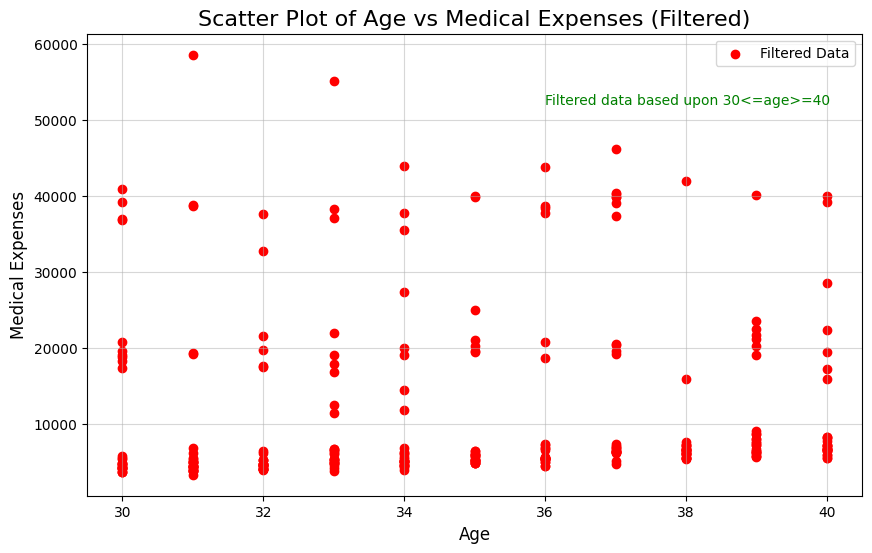

In [181]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['age'], filtered_data['expenses'], c='red', marker='o', label='Filtered Data')
plt.title("Scatter Plot of Age vs Medical Expenses (Filtered)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Medical Expenses", fontsize=12)
plt.text(36, 52000, "Filtered data based upon 30<=age>=40", fontsize=10, color='green')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

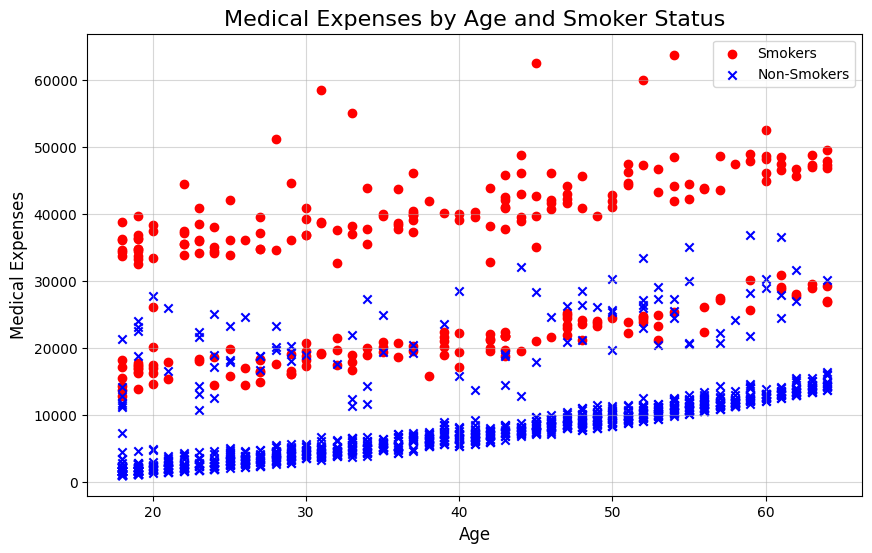

In [191]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['smoker'] == 1]['age'],
            data[data['smoker'] == 1]['expenses'],
            c='red', marker='o', label='Smokers')
plt.scatter(data[data['smoker'] == 0]['age'],
            data[data['smoker'] == 0]['expenses'],
            c='blue', marker='x', label='Non-Smokers')
plt.title("Medical Expenses by Age and Smoker Status", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Medical Expenses", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()